In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import metrics
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
# Loading the data set 
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
# Lets check the dimension of the data set 
df.shape

(110813, 11)

In [ ]:
#Show the name of columns 
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Lets start by checking the count of records in each column of the data set. 
# If the count of records is lesser than the total number of records i.e. 768, we can conclude that there 
# are blank records. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            110813 non-null  int64  
 1   type            110813 non-null  object 
 2   amount          110813 non-null  float64
 3   nameOrig        110813 non-null  object 
 4   oldbalanceOrg   110813 non-null  float64
 5   newbalanceOrig  110813 non-null  float64
 6   nameDest        110813 non-null  object 
 7   oldbalanceDest  110813 non-null  float64
 8   newbalanceDest  110812 non-null  float64
 9   isFraud         110812 non-null  float64
 10  isFlaggedFraud  110812 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.3+ MB


In [ ]:
df.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest     True
isFraud            True
isFlaggedFraud     True
dtype: bool

In [ ]:
# "isFraud" is set to 1 only in cases of "TRANSFER" and "CASH_OUT" transactions, we set them to 0 and 1 respectively. Also we drop the unrequired data fields, that are required

X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

y = X['isFraud']

def converter(type_bin):
    if(type_bin=='TRANSFER'):
        return 0
    else:
        return 1
X['type_bin']=X['type'].apply(converter)

X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','type'], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_bin
2,1,181.00,181.0,0.0,0.00,0.00,1.0,0
3,1,181.00,181.0,0.0,21182.00,0.00,1.0,1
15,1,229133.94,15325.0,0.0,5083.00,51513.44,0.0,1
19,1,215310.30,705.0,0.0,22425.00,0.00,0.0,0
24,1,311685.89,10835.0,0.0,6267.00,2719172.89,0.0,0
...,...,...,...,...,...,...,...,...
42266,9,195364.06,0.0,0.0,506957.59,1343781.67,0.0,1
42267,9,546075.62,0.0,0.0,5075471.31,5621546.93,0.0,1
42268,9,111003.87,0.0,0.0,2533159.94,2644163.81,0.0,1
42269,9,101025.44,0.0,0.0,156646.32,491301.04,0.0,1


**Sampling of Data**

In [ ]:
no_frauds=len(X[X['isFraud']==1])
no_frauds

120

In [ ]:
non_fraud_indices=X[X.isFraud==0].index
non_fraud_indices

Int64Index([    15,     19,     24,     42,     47,     48,     51,     58,
                60,     70,
            ...
            110790, 110791, 110793, 110794, 110798, 110799, 110800, 110803,
            110804, 110811],
           dtype='int64', length=43905)

In [ ]:
random_indices=np.random.choice(non_fraud_indices,no_frauds,replace=False)
random_indices

array([109481,  37533,  60144,  53773,  35104,  70893,  48957,  29526,
        60761,  57296,  91594,  58772,  80054,   2582,  12548,  99321,
        43592,  30897,  77588,  54794,    199,  45228,  37786,  14371,
        91167,  79143,  84556,  91608,  54515,   9627,  56763,  85617,
        23380,  70830,  61504,  43839,  28346,  16947,  12740,  95928,
        18721, 107449, 105136,  22787,  32002,  67233,  62557,  86377,
        49262,  45980,  78843,  80831,  86379, 109148,  32406,  56285,
        54758,  87760,  18777,  91453,  32955,  31929,  72879,  76851,
       102916,  80491,   8899,  76854,  79905,  87738,  81708,  52331,
        51506,  16194,  89503,  23915, 101986,  67142,  97365,  19408,
        57275,  57023,  92264,  80224,  38659,  85563,  47540,  44340,
        77842,  72269,  52361,  14064,  88539,  69569, 107436,  37431,
        52243,  23493, 102861,  33192,  68555,  21519,  21740,  49692,
        86014,  27906,  24333, 110742,  57714,  23772,  83947,  35855,
      

In [ ]:
fraud_indices=X[X.isFraud==1].index
fraud_indices

Int64Index([     2,      3,    251,    252,    680,    681,    724,    969,
               970,   1115,
            ...
             72931,  77745,  90070,  90071,  99371,  99372, 102180, 102181,
            102607, 102608],
           dtype='int64', length=120)

In [ ]:
under_sample_indices=np.concatenate([fraud_indices,random_indices])
under_sample_indices

array([     2,      3,    251,    252,    680,    681,    724,    969,
          970,   1115,   1116,   1869,   1870,   1911,   2301,   2302,
         3059,   3060,   3162,   3163,   3271,   3272,   3683,   3684,
         4103,   4104,   4260,   4261,   4440,   4441,   4442,   4443,
         4667,   4668,   4693,   4694,   4775,   4776,   4857,   4858,
         5123,   5124,   5466,   5467,   5558,   5559,   5746,   5747,
         5852,   5853,   5994,   5995,   6583,   6584,   6702,   6703,
         6706,   6707,   6897,   6898,   7002,   7003,   7029,   7030,
         7154,   7155,   9284,   9285,  10218,  10219,  10395,  10396,
        12179,  12180,  12214,  12215,  12467,  12468,  14861,  18771,
        18772,  24966,  24967,  25875,  33472,  33473,  33913,  33914,
        34168,  34169,  36026,  36027,  36691,  36692,  47144,  47145,
        49825,  49826,  49885,  49886,  56477,  56478,  58307,  58308,
        60853,  69201,  69202,  72510,  72511,  72930,  72931,  77745,
      

In [ ]:
under_sample=X.loc[under_sample_indices]
under_sample

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_bin
2,1,181.00,181.0,0.00,0.00,0.00,1.0,0
3,1,181.00,181.0,0.00,21182.00,0.00,1.0,1
251,1,2806.00,2806.0,0.00,0.00,0.00,1.0,0
252,1,2806.00,2806.0,0.00,26202.00,0.00,1.0,1
680,1,20128.00,20128.0,0.00,0.00,0.00,1.0,0
...,...,...,...,...,...,...,...,...
44592,9,10301.52,10976.0,674.48,252598.00,79126.07,0.0,1
103536,10,1973881.22,20820.0,0.00,201782.54,2769467.38,0.0,0
106940,10,469182.60,0.0,0.00,29167533.25,29560254.29,0.0,1
57328,9,19580.67,3932.0,0.00,1055025.54,0.00,0.0,1


**Decision Tree Model Implementation**

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_under_train,y_under_train)

DecisionTreeClassifier()

In [ ]:
X_under=under_sample.loc[:,under_sample.columns!='isFraud']
y_under=under_sample.loc[:,under_sample.columns=='isFraud']
X_under_train,X_under_test,y_under_train,y_under_test=train_test_split(X_under,y_under,test_size=0.3,random_state=101)

In [ ]:
pred=dt.predict(X_under_test)

In [ ]:
print(classification_report(y_under_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        36
         1.0       0.97      0.89      0.93        36

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72



In [ ]:
print(accuracy_score(y_under_test,pred))

0.9305555555555556


In [ ]:
features=list(X_under.columns[:])
features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'type_bin']

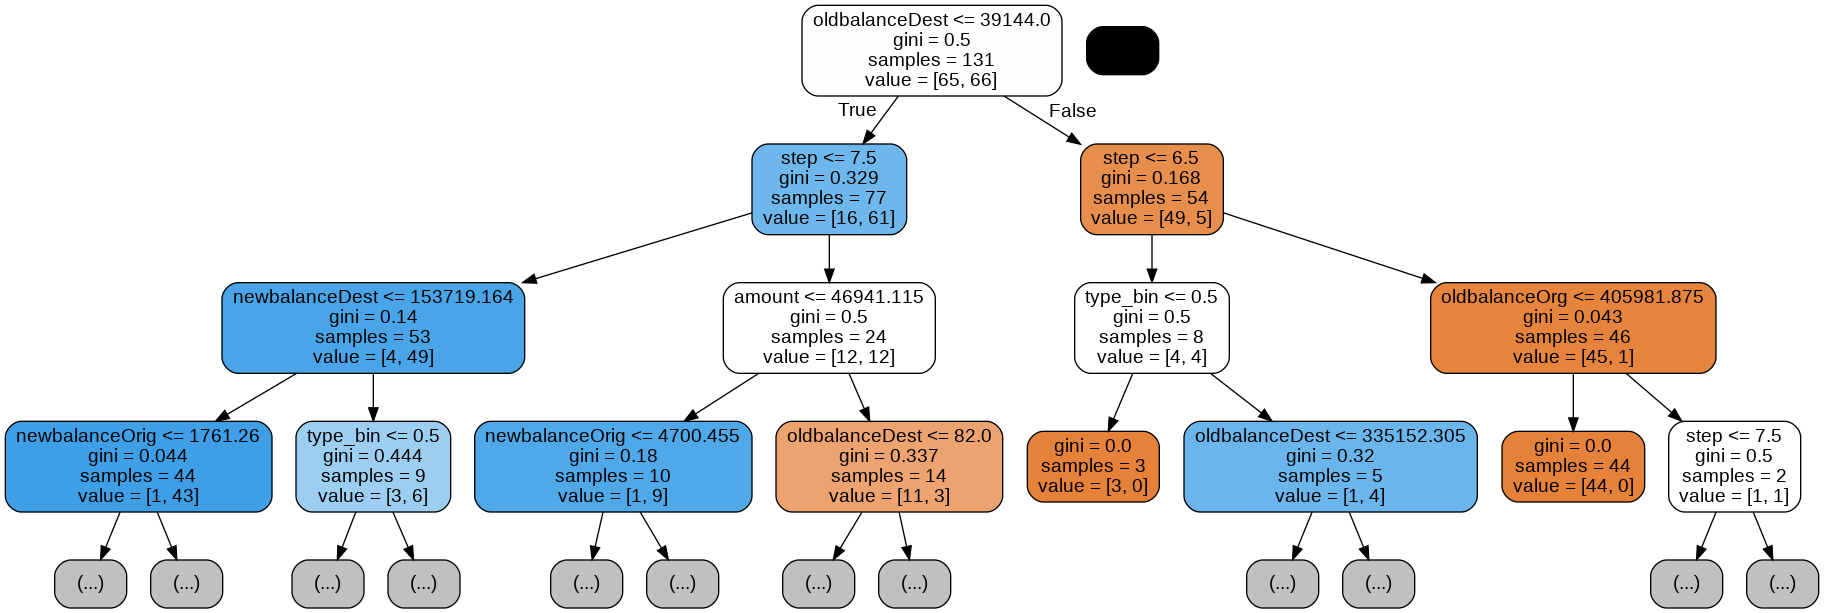

In [ ]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,max_depth=3,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())